# NETFLIX CASE STUDY

Let's import the necessary libraries required.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let us import our dataset.

In [2]:
df = pd.read_csv('netflix.csv')

# Getting Started
Let's view the first 5 rows of the dataset.

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Let's explore the details of each column:

**Show_id**: Unique ID for every Movie / Tv Show

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description

___


How many entries are there in this data?

In [4]:
df.shape

(8807, 12)

The dataset consists of 8807 rows i.e. 8807 unique Movies/TV Shows, and 12 columns/fields.

Let's further explore the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As we can see, some of the columns have **non-null** values less than the total number of rows i.e. 8807, which means some rows have missing values.

Let us see the count of missing values for each column.

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can see that the columns ```director```, ```cast```, ```country```, ```date_added```, ```rating``` and ```duration``` have missing values. How can we handle these?
- One option is to drop the rows with missing values. But each row in the dataset represents a unique Movie/TV Show, hence dropping the row would result in loss of potentially important data.
- Hence, an alternative is implemented, to replace the missing values with a placeholder.
- For the columns ```director```, ```cast``` and ```country```, the placeholder for missing values will be taken as **'Unknown'**.
- For the column ```date_added```, for missing values, it will be assumed that the content was added to Netflix on 31st December of the year it was released.

Let us first implement these changes.

In [7]:
# director, cast, country
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# date_added
date_added_missing_values = df[df['date_added'].isna()]['release_year'].apply(lambda x: 'December 31, '+str(x))
df['date_added'].fillna(date_added_missing_values, inplace=True)

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

Now, columns ```rating``` and ```duration``` still have missing values. Let's have a look at these.

In [9]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


For the column ```duration```, we can see that the column ```rating``` has been accidentally filled in with the values of the column ```duration```.

Let us replace them back to the ```duration```.

For the ```rating``` column, we will assume that the missing values mean that the content was not rated and hence fill the missing values with **'NR'**.

In [11]:
# duration
duration_missing_values = df[df['duration'].isna()]['rating']
df['duration'].fillna(duration_missing_values, inplace=True)

# replacing the misplaced values in 'rating' column with np.nan
df.loc[duration_missing_values.index,'rating'] = np.nan

# rating
df['rating'].fillna('NR', inplace=True)

In [12]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now that all the missing values have been replaced, let us explore perform some further pre-processing.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The ```date_added``` column is of the type 'object', which needs to be converted to **datetime**. 

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In the dataset, the columns ```director```, ```cast```, ```country``` and ```listed_in``` have comma-separated values. For simplicity of analysis, we will explode these values so that each row will have a unique value.

In [16]:
columns_to_explode = ['director', 'cast', 'country', 'listed_in']
for column in columns_to_explode:
    df[column] = df[column].str.split(', ')
    df = df.explode(column).reset_index(drop=True)

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [18]:
df.shape

(201991, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   director      201991 non-null  object        
 4   cast          201991 non-null  object        
 5   country       201991 non-null  object        
 6   date_added    201991 non-null  datetime64[ns]
 7   release_year  201991 non-null  int64         
 8   rating        201991 non-null  object        
 9   duration      201991 non-null  object        
 10  listed_in     201991 non-null  object        
 11  description   201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [20]:
df.nunique()

show_id          8807
type                2
title            8807
director         4994
cast            36440
country           128
date_added       1719
release_year       74
rating             14
duration          220
listed_in          42
description      8775
dtype: int64

For simplicity later, movies and TV Shows are separated into two separate dataframes.

In [21]:
movies = df[df['type']=='Movie']
tv_shows = df[df['type']=='TV Show']

# 1. Content related trends

## 1.1 Distribution of Content type (Movies vs. TV Shows)

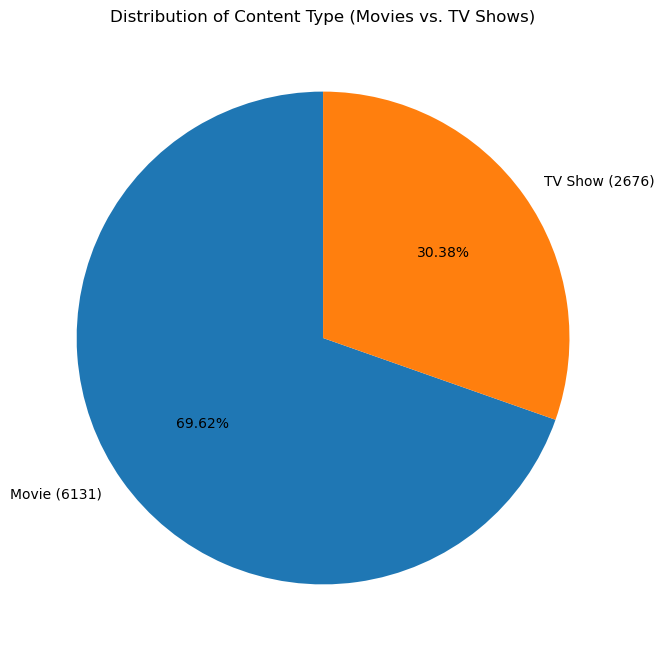

In [22]:
type_counts = df.groupby('type')['show_id'].nunique()

plt.figure(figsize=(8,8))
plt.pie(
    x=type_counts, 
    labels=[f"{label} ({count})" for label, count in zip(type_counts.index, type_counts)], 
    autopct='%.2f%%', 
    startangle=90
)
plt.title('Distribution of Content Type (Movies vs. TV Shows)')
plt.show()

**Insights**:

With an almost 70% share, Netflix produces significant number of movies over TV shows, showing a stronger preference of audiences to one-time viewing experience over long-term storytelling.

## 1.2. What is the distribution of duration of Movies and TV Shows? How does it vary by different Genres?

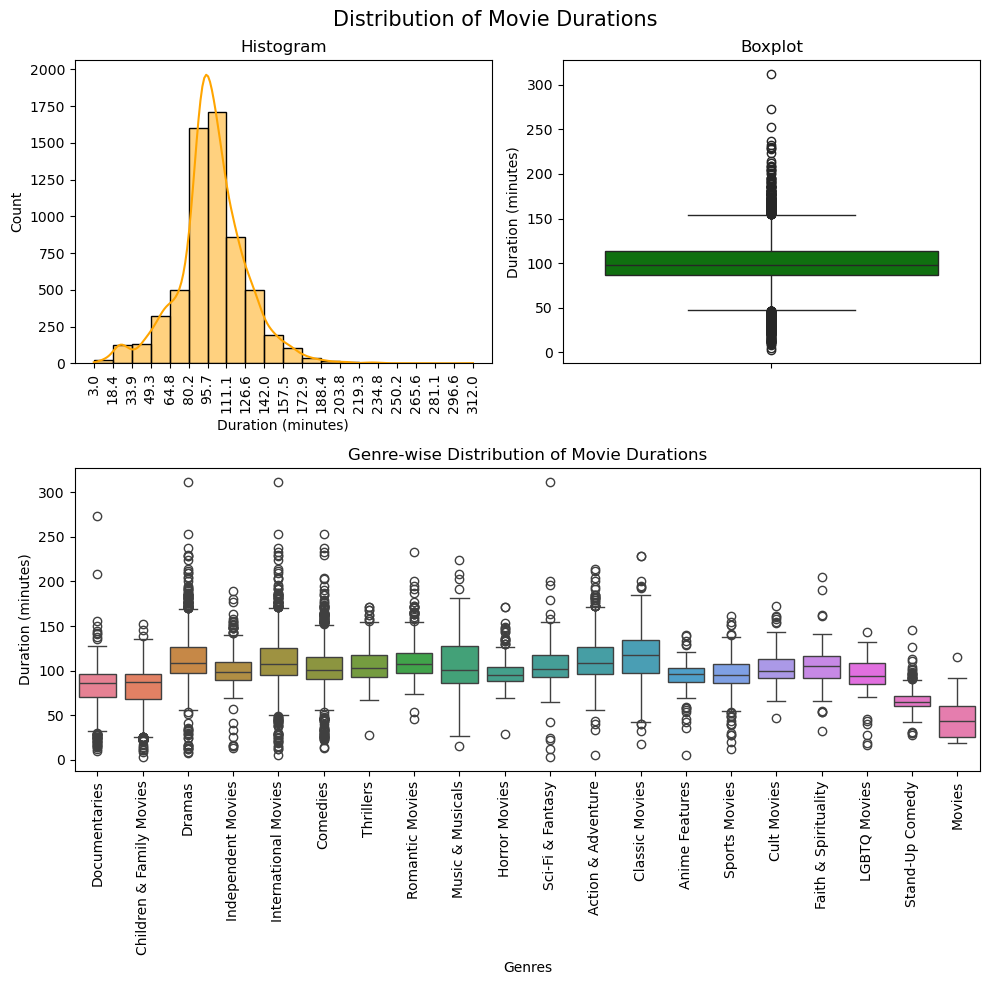

In [23]:
movies['duration'] = movies['duration'].apply(lambda x: int(x.split()[0]) if type(x) != int else x)
movies_duration = movies.groupby('show_id')['duration'].unique().explode()
movies_duration_genres = movies[['show_id','duration','listed_in']].drop_duplicates().reset_index(drop=True)

plt.figure(figsize=(10,10)).suptitle('Distribution of Movie Durations', fontsize=15)

plt.subplot(2,2,1)
sns.histplot(data=movies_duration, 
             bins=20, 
             kde=True, 
             color='orange')
plt.title('Histogram')
plt.xlabel('Duration (minutes)')
plt.xticks(np.linspace(movies['duration'].min(),movies['duration'].max(),21), rotation =90)
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.boxplot(data=movies_duration, color='green')
plt.title('Boxplot')
plt.ylabel('Duration (minutes)')

plt.subplot(2,2,(3,4))
sns.boxplot(data=movies_duration_genres, x='listed_in', y='duration', hue='listed_in')
plt.title('Genre-wise Distribution of Movie Durations')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

**Insights**:

1. Most of the movies have duration between 80 to 120 minutes i.e. approximately 1.5 to 2 hours.
2. Classic, old movies seem to have longer duration, followed by dramas. Whereas standalone movie-like content like Stand-Up Comedy have much shorter duration.  

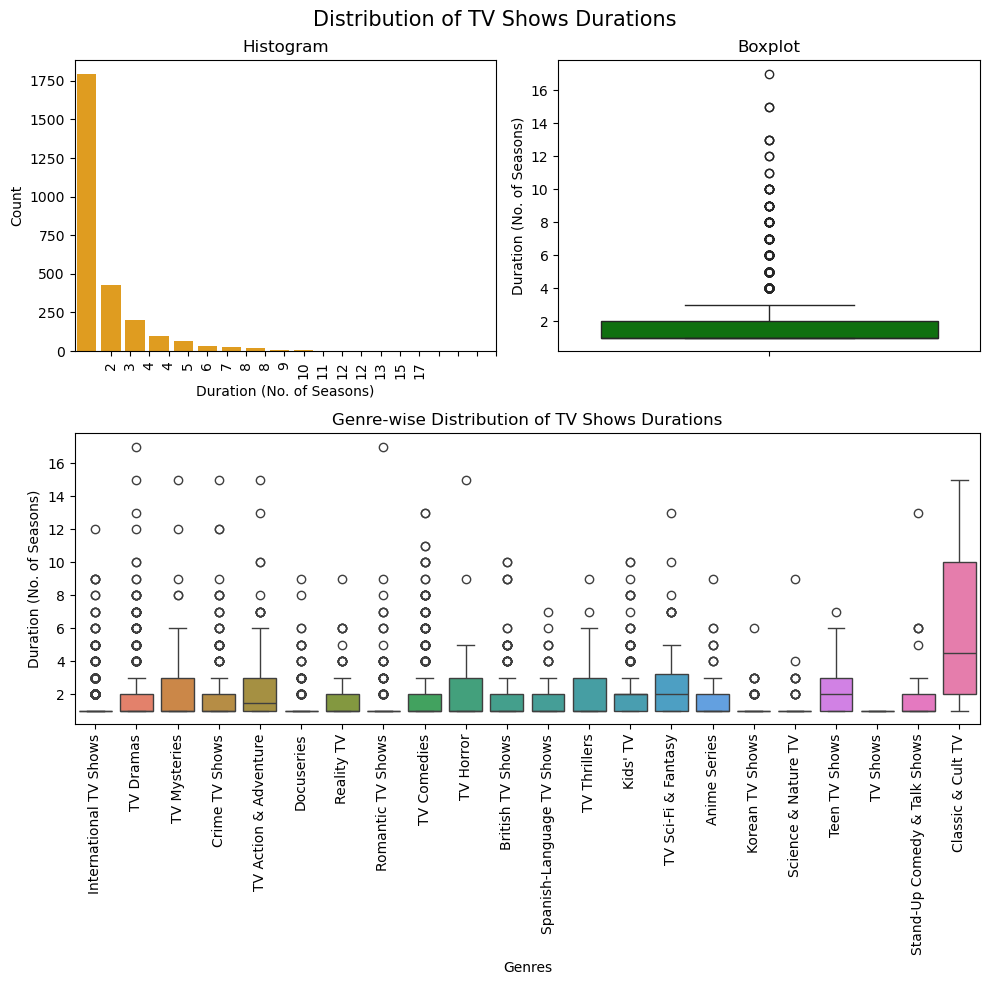

In [24]:
tv_shows['duration'] = tv_shows['duration'].apply(lambda x: int(x.split()[0]) if type(x) != int else x)
tv_duration = tv_shows.groupby('show_id')['duration'].unique().explode()
tv_duration_genres = tv_shows[['show_id','duration','listed_in']].drop_duplicates().reset_index(drop=True)

plt.figure(figsize=(10,10)).suptitle('Distribution of TV Shows Durations', fontsize=15)

plt.subplot(2,2,1)
sns.barplot(data=tv_duration.value_counts(),
             color='orange')
plt.title('Histogram')
plt.xlabel('Duration (No. of Seasons)')
plt.xticks(np.linspace(tv_shows['duration'].min(),tv_shows['duration'].max(),21), rotation =90)
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.boxplot(data=tv_duration, color='green')
plt.title('Boxplot')
plt.ylabel('Duration (No. of Seasons)')

plt.subplot(2,2,(3,4))
sns.boxplot(data=tv_duration_genres, x='listed_in', y='duration', hue='listed_in')
plt.title('Genre-wise Distribution of TV Shows Durations')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Duration (No. of Seasons)')

plt.tight_layout()
plt.show()

**Insights**:

1. In case of TV Shows, Shows with a single season seem to be most popular, since people prefer to have a closure to the storyline by the end of a series, and they don't intend to wait another whole year in anticipation of the further plot.
2. Classic and cult TV content is the most popular amongst TV Shows. 

## 1.3 Most Popular Genres on Netflix

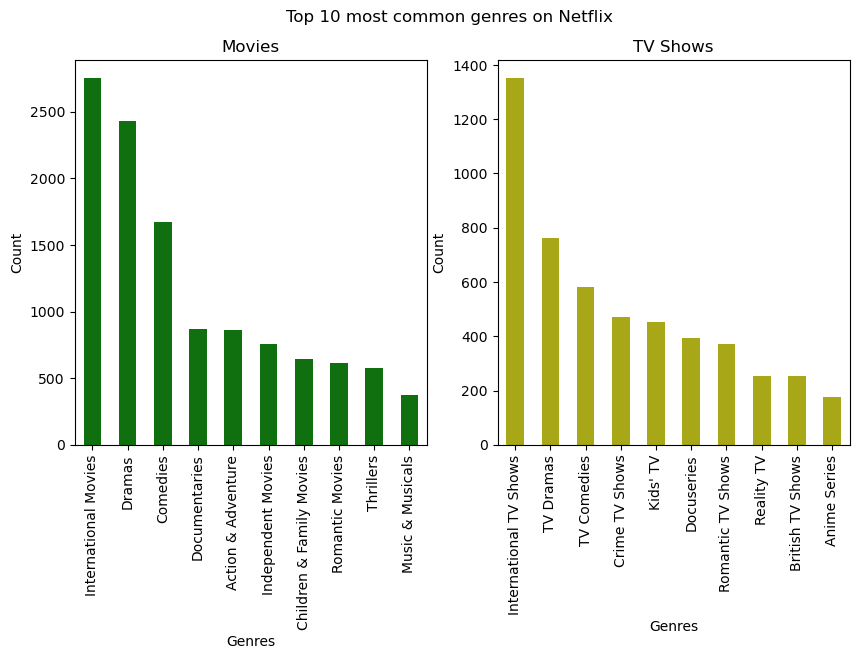

In [25]:
top10_movie_genres = movies.groupby('listed_in')['show_id'].nunique().sort_values(ascending=False).head(10)
top10_tv_genres = tv_shows.groupby('listed_in')['show_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5)).suptitle('Top 10 most common genres on Netflix')

plt.subplot(1,2,1)
sns.barplot(x=top10_movie_genres.index, y=top10_movie_genres, color='g', width=0.5)
plt.title('Movies')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(x=top10_tv_genres.index, y=top10_tv_genres, color='y', width=0.5)
plt.title('TV Shows')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.show()

**Insights**:

1. Top-3 Most popular genres in Movies are Dramas, Comedies and Documentaries. Whereas for TV Shows, Dramas, Comedies and Crime Shows.
2. People seem to prefer standalone documentaries to docuseries.
3. High count of International Movies and TV shows denotes a demand for globally diverse content.

## 1.4 Who are the most frequently listed directors and actors?

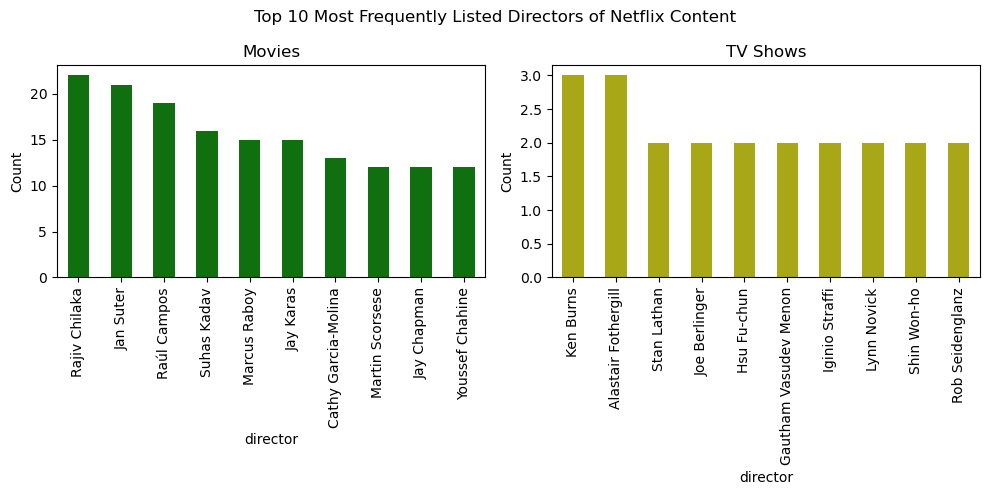

In [26]:
top10_movie_directors = movies.groupby('director')['show_id'].nunique().sort_values(ascending=False)[1:11]
top10_tv_directors = tv_shows.groupby('director')['show_id'].nunique().sort_values(ascending=False)[1:11]

plt.figure(figsize=(10,5)).suptitle('Top 10 Most Frequently Listed Directors of Netflix Content')

plt.subplot(1,2,1)
sns.barplot(x=top10_movie_directors.index, y=top10_movie_directors, color='g', width=0.5)
plt.title('Movies')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(x=top10_tv_directors.index, y=top10_tv_directors, color='y', width=0.5)
plt.title('TV Shows')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Insights**:

Top-3 directors in Movies are Rajiv Chilaka, Jan Suter and Raul Campos, whereas for TV shows Ken Burns, Alastair Fothergill and Stan Lathan are the winners.

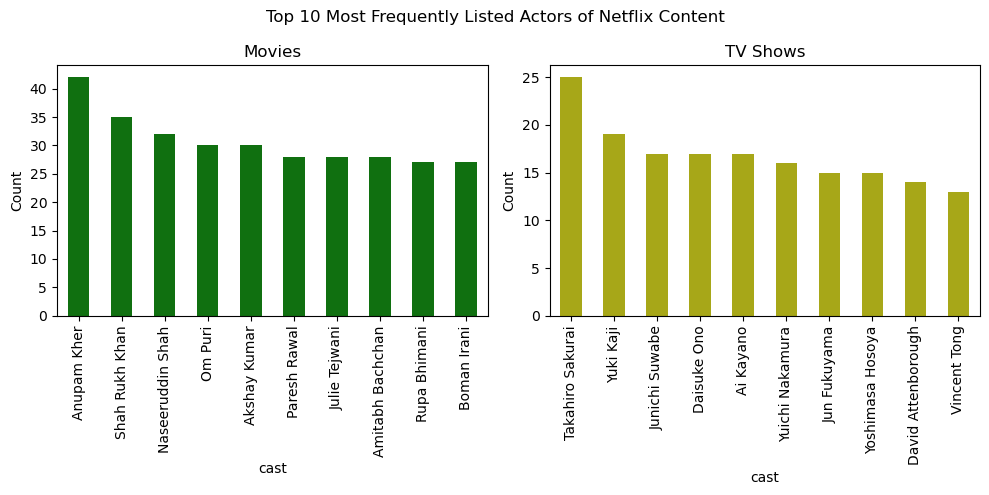

In [27]:
top10_movie_actors = movies.groupby('cast')['show_id'].nunique().sort_values(ascending=False)[1:11]
top10_tv_actors = tv_shows.groupby('cast')['show_id'].nunique().sort_values(ascending=False)[1:11]

plt.figure(figsize=(10,5)).suptitle('Top 10 Most Frequently Listed Actors of Netflix Content')

plt.subplot(1,2,1)
sns.barplot(x=top10_movie_actors.index, y=top10_movie_actors, color='g', width=0.5)
plt.title('Movies')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(x=top10_tv_actors.index, y=top10_tv_actors, color='y', width=0.5)
plt.title('TV Shows')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Insights**:

1. Top-3 actors with most movies on Netflix are Anupam Kher, Shah Rukh Khan and Naseruddin Shah. For TV Shows, the top-3 actors are Takahiro Sakurai, Yuki Kaji and Junichi Suwabe.
2. An interesting insight is that all top-10 actors with most movies on Netflix are of the Indian origin. 

## 1.5 What are the most common ratings on Netflix?

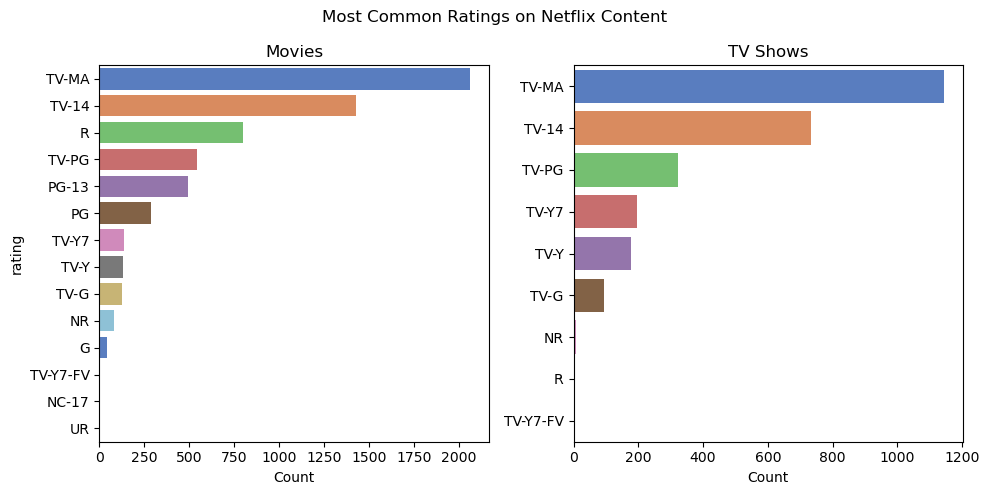

In [28]:
movie_ratings = df[df['type'] == 'Movie'].groupby('rating')['show_id'].nunique().sort_values(ascending=False)
tv_ratings = df[df['type'] == 'TV Show'].groupby('rating')['show_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,5)).suptitle('Most Common Ratings on Netflix Content')

plt.subplot(1,2,1)
sns.barplot(y=movie_ratings.index, x=movie_ratings, palette='muted')
plt.title('Movies')
plt.xlabel('Count')

plt.subplot(1,2,2)
sns.barplot(y=tv_ratings.index, x=tv_ratings, palette='muted')
plt.title('TV Shows')
plt.xlabel('Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Insights**:

1. The top-3 most common ratings of Netflix content are TV-MA, TV-14 and TV-PG, although R-rated movie content is also infamously ample.
2. Surprisingly, General (G) content is very less in numbers. 

# 2. Geographic Trends

## 2.1 Which countries produce the most content?

In [29]:
countries = df[df['country'] != 'Unknown'].groupby('country')['show_id'].nunique().sort_values(ascending=False).reset_index(name='count')
top10_countries = countries.head(10)['country'].values
countries['country'] = countries['country'].apply(lambda x : x if x in top10_countries else 'Other')

In [30]:
top10_countries

array(['United States', 'India', 'United Kingdom', 'Canada', 'France',
       'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico'], dtype=object)

In [31]:
countries

,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Other,1
123,Other,1
124,Other,1
125,Other,1


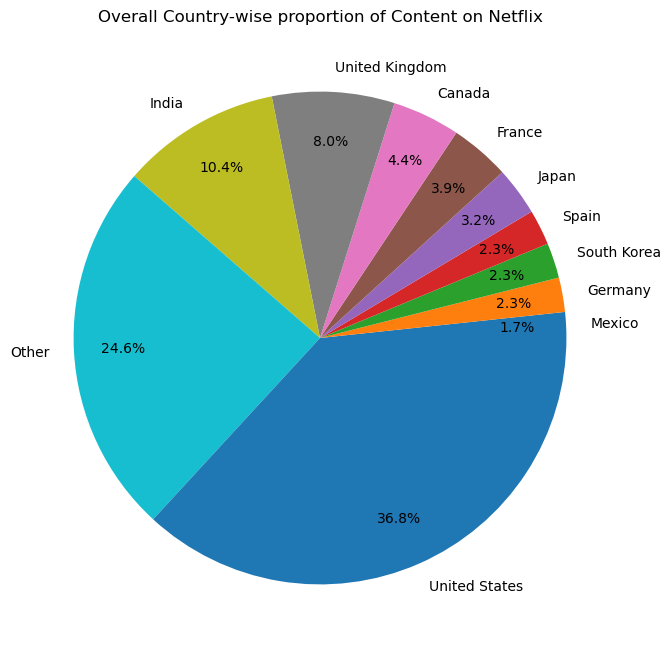

In [32]:
countries_counts = countries.groupby('country')['count'].sum().sort_values()
plt.figure(figsize=(8,8))
plt.pie(countries_counts,
        labels = countries_counts.index, 
        autopct='%.1f%%', 
        pctdistance=0.8)
plt.title('Overall Country-wise proportion of Content on Netflix')
plt.show()

**Insights**:

1. Top-3 countries with the most content are United States (US), India and United Kingdom (UK).
2. Although at #2, India still lags far behind in production, with only 10% share, compared to a whopping 37% share of US-based content.

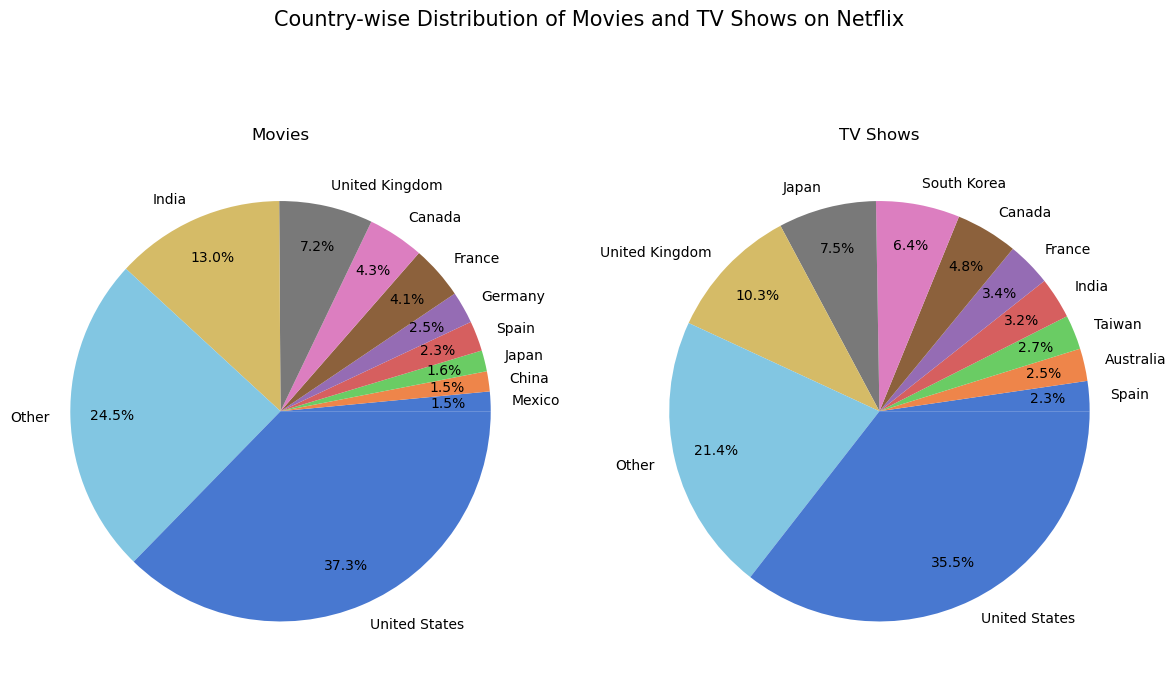

In [33]:
countries_movies = movies[movies['country'] != 'Unknown'].groupby('country')['show_id'].nunique().sort_values(ascending=False).reset_index(name='count')
countries_tv = tv_shows[tv_shows['country'] != 'Unknown'].groupby('country')['show_id'].nunique().sort_values(ascending=False).reset_index(name='count')

top10_countries_movies = countries_movies.head(10)['country'].values
top10_countries_tv = countries_tv.head(10)['country'].values

countries_movies['country'] = countries_movies['country'].apply(lambda x: x if x in top10_countries_movies else 'Other')
countries_tv['country'] = countries_tv['country'].apply(lambda x: x if x in top10_countries_tv else 'Other')

countries_movies_counts = countries_movies.groupby('country')['count'].sum().sort_values()
countries_tv_counts = countries_tv.groupby('country')['count'].sum().sort_values()

plt.figure(figsize=(12,8)).suptitle('Country-wise Distribution of Movies and TV Shows on Netflix', fontsize=15)

plt.subplot(1,2,1)
plt.pie(x = countries_movies_counts,
        labels = countries_movies_counts.index, 
        autopct='%.1f%%', 
        pctdistance=0.8,
        colors=sns.color_palette(palette='muted', n_colors=11))
plt.title('Movies', fontsize=12)

plt.subplot(1,2,2)
plt.pie(x = countries_tv_counts,
        labels = countries_tv_counts.index, 
        autopct='%.1f%%', 
        pctdistance=0.8,
        colors=sns.color_palette(palette='muted', n_colors=11))
plt.title('TV Shows', fontsize=12)

plt.tight_layout()
plt.show()

**Insights**:

The bifurgation between Movies and TV Shows, shows an interesting insight. Japan is at #3 in producing TV Shows, followed by South Korea, which could be because of increasing global popularity of Japnese Anime series and Korean Dramas.  

## 2.2 What genres are most popular in top 10 countries?

In [34]:
top10_country_genres = df[df['country'].isin(top10_countries)]
top10_country_genres = top10_country_genres.groupby(['country','listed_in'])['show_id'].nunique().reset_index(name='count')
top10_country_genres_pivot = top10_country_genres.pivot_table(index='country',columns='listed_in',values='count').T
top10_country_genres_pivot = top10_country_genres_pivot[list(top10_countries)]
top10_country_genres_pivot

country,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
listed_in,,,,,,,,,,
Action & Adventure,404.0,137.0,84.0,44.0,37.0,57.0,10.0,17.0,33.0,9.0
Anime Features,7.0,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN
Anime Series,18.0,NaN,NaN,2.0,NaN,143.0,1.0,NaN,NaN,NaN
British TV Shows,24.0,3.0,225.0,3.0,2.0,1.0,5.0,NaN,6.0,NaN
Children & Family Movies,390.0,26.0,46.0,80.0,23.0,19.0,9.0,10.0,17.0,5.0
Classic & Cult TV,17.0,NaN,7.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0
Classic Movies,81.0,11.0,16.0,NaN,6.0,3.0,1.0,NaN,NaN,1.0
Comedies,680.0,323.0,91.0,94.0,51.0,9.0,47.0,17.0,42.0,24.0
Crime TV Shows,145.0,9.0,48.0,15.0,23.0,16.0,27.0,24.0,15.0,32.0


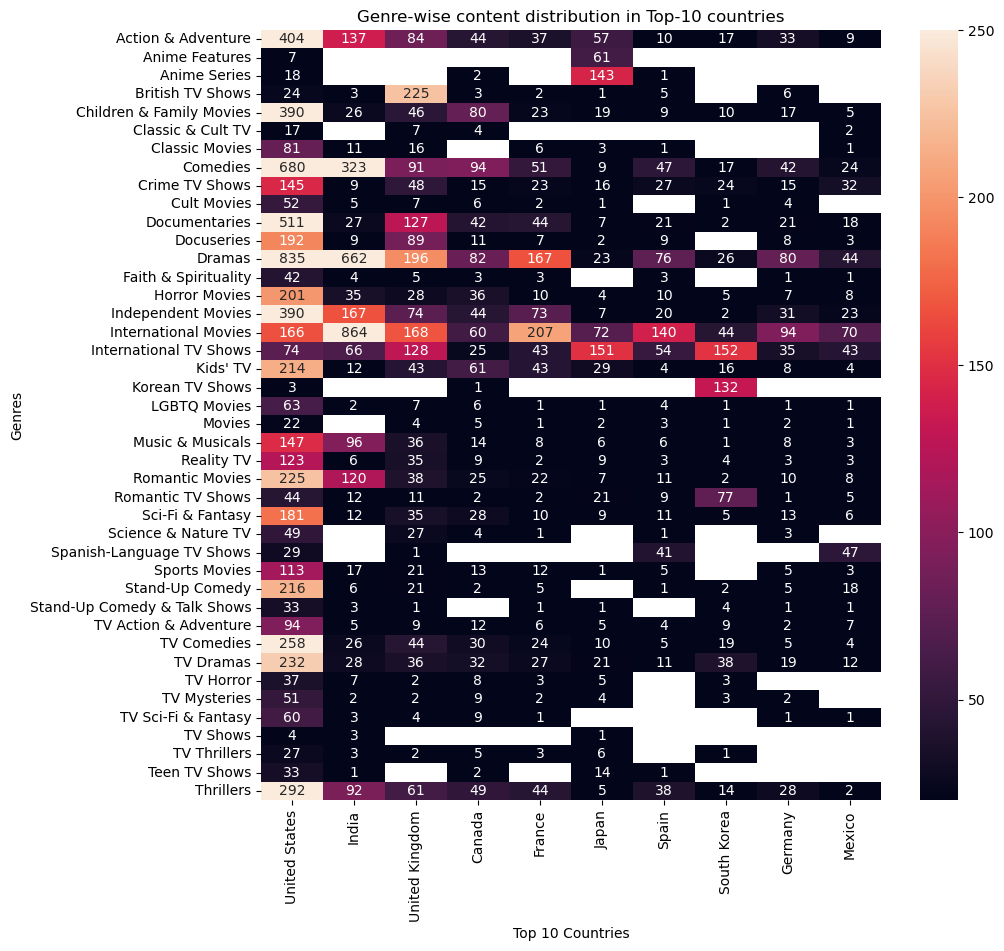

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data=top10_country_genres_pivot,
            annot=True, 
            fmt=".0f", 
            vmin = 20,
            vmax = 250)
plt.title('Genre-wise content distribution in Top-10 countries')
plt.xlabel('Top 10 Countries')
plt.ylabel('Genres')
plt.show()

**Insights**:
1. Some popular genres across all countries are Dramas, Comedies and Action films.
2. United States seems to be diversifing its content into almost all the genres, with major focus on Documentaries, Comedies, Dramas, etc.
3. Popular genres in India are Dramas and International Movies. 

# Temporal Trends

## 3.1 How has the number of releases per year evolved over time?

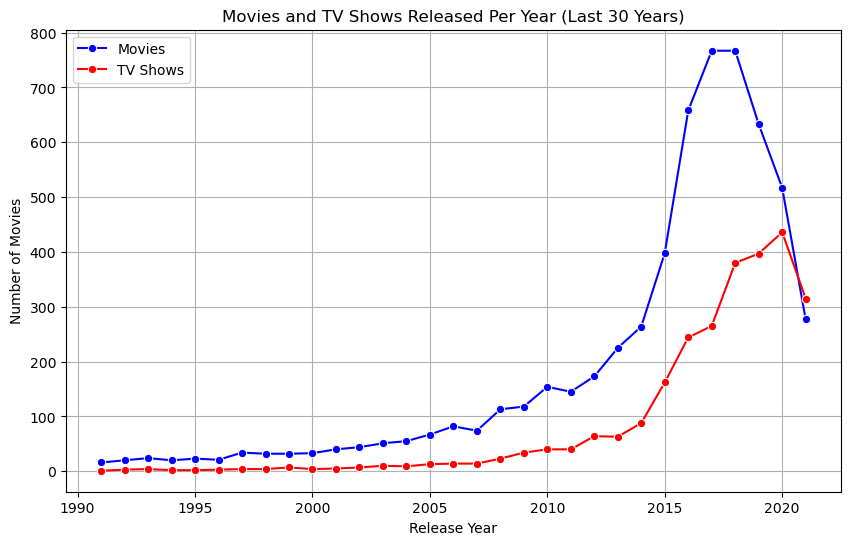

In [45]:
last_30_years_movies = df[(df['type'] == 'Movie') & (df['release_year'] >= df['release_year'].max() - 30)]
last_30_years_tv_shows = df[(df['type'] == 'TV Show') & (df['release_year'] >= df['release_year'].max() - 30)]

movies_per_year = last_30_years_movies.groupby('release_year')['show_id'].nunique()
tv_shows_per_year = last_30_years_tv_shows.groupby('release_year')['show_id'].nunique()

plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='b', label='Movies')
sns.lineplot(x=tv_shows_per_year.index, y=tv_shows_per_year.values, marker='o', color='r', label='TV Shows')
plt.title('Movies and TV Shows Released Per Year (Last 30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

**Insights**:

Again, Netflix's prference is to producing more Movies over TV Shows. The sudden decrease in the number of Movies and TV Shows released after 2019 shows the drastic effect of COVID-19 Pandemic.

## 3.2 Which countries are adding more and more content on Netflix with time?

In [37]:
countries_date_added = df[['show_id','type','country','date_added']]
countries_date_added['year_added'] = countries_date_added['date_added'].dt.year
countries_date_added = countries_date_added[countries_date_added['country'].isin(top10_countries)]
countries_date_added = countries_date_added.groupby(['country','year_added'])['show_id'].nunique().reset_index(name='count')
countries_date_added

,country,year_added,count
0,Canada,2013,1
1,Canada,2014,3
2,Canada,2015,6
3,Canada,2016,30
4,Canada,2017,71
...,...,...,...
80,United States,2017,462
81,United States,2018,600
82,United States,2019,856
83,United States,2020,828


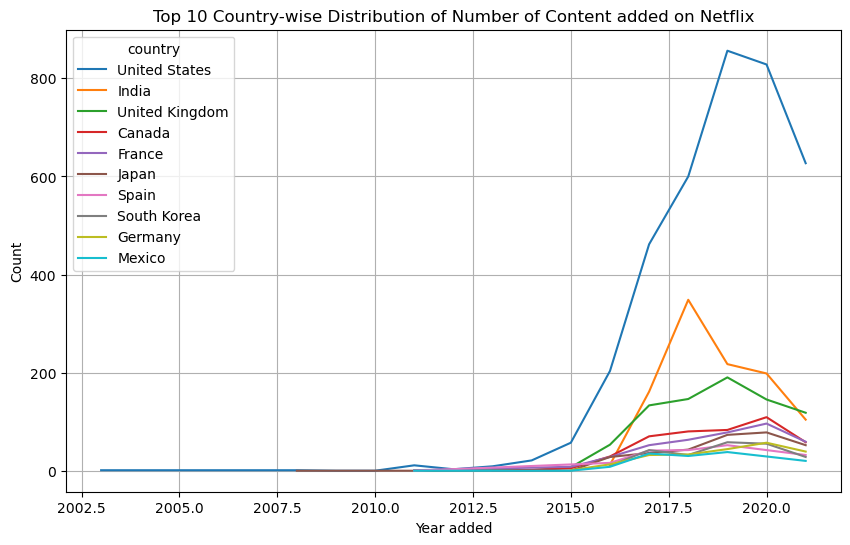

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(data=countries_date_added, x='year_added', y='count', hue='country', hue_order=top10_countries)
plt.title('Top 10 Country-wise Distribution of Number of Content added on Netflix')
plt.xlabel('Year added')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Insights**:

United States leads the production of content on Netflix. However, India has seen a sudden rise in production of content after 2015. 

## 3.3 How has the duration of movies changed with time? Is there any influence of countries?

In [39]:
countries_duration = movies[['country','release_year','duration']].drop_duplicates().reset_index(drop=True)
countries_duration = countries_duration[countries_duration['country'].isin(top10_countries_movies[:5])]
countries_duration

,country,release_year,duration
0,United States,2020,90
2,United States,1993,125
5,United Kingdom,1993,125
8,United States,2021,104
15,India,1998,166
...,...,...,...
5624,United States,2011,94
5626,United States,2005,88
5628,France,2016,98
5631,United States,2006,88


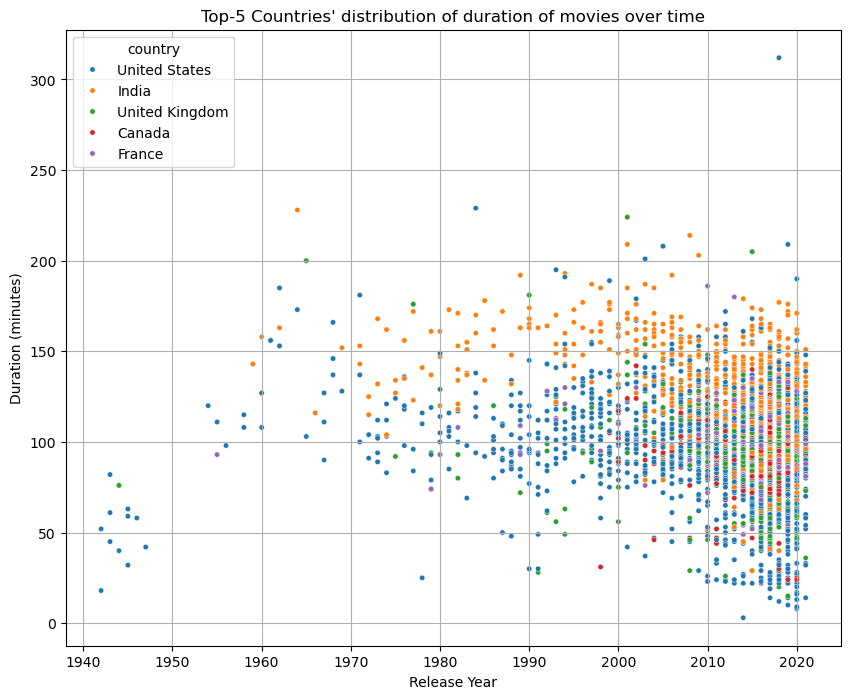

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=countries_duration, 
                x='release_year',
                y='duration',
                hue='country', 
                hue_order=top10_countries[:5], 
                s=15)
plt.title("Top-5 Countries' distribution of duration of movies over time")
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

**Insights**:

1. The duration of movies has been shrunk over the years, with users prefering a median duration of 100 minutes (almost 1.5 hours).
2. Indian movie durations are relatively higher by almost 50 minutes than US movie durations.

## 3.4 Are there any seasonal trends in addition of content to Netflix?

In [41]:
date_added_genres = df[['show_id','date_added','listed_in']]
date_added_genres['month_added'] = date_added_genres['date_added'].dt.month_name()
date_added_genres = date_added_genres.drop_duplicates().reset_index(drop=True)
date_added_genres = date_added_genres.groupby(['month_added','listed_in'])['show_id'].nunique().reset_index(name='count')
date_added_genres = date_added_genres.pivot_table(index='listed_in',columns='month_added',values='count')
date_added_genres = date_added_genres[['January','February','March','April','May','June','July','August','September','October','November','December']]
date_added_genres

month_added,January,February,March,April,May,June,July,August,September,October,November,December
listed_in,,,,,,,,,,,,
Action & Adventure,79.0,46.0,61.0,70.0,54.0,72.0,83.0,86.0,93.0,69.0,78.0,68.0
Anime Features,4.0,5.0,3.0,4.0,4.0,12.0,4.0,3.0,21.0,4.0,3.0,4.0
Anime Series,11.0,9.0,13.0,20.0,10.0,22.0,15.0,12.0,13.0,15.0,15.0,21.0
British TV Shows,13.0,18.0,36.0,20.0,10.0,11.0,32.0,22.0,27.0,28.0,11.0,25.0
Children & Family Movies,63.0,33.0,53.0,56.0,43.0,42.0,65.0,41.0,59.0,57.0,67.0,62.0
Classic & Cult TV,2.0,NaN,3.0,NaN,1.0,2.0,6.0,2.0,3.0,2.0,NaN,7.0
Classic Movies,18.0,2.0,14.0,2.0,1.0,13.0,9.0,7.0,6.0,7.0,27.0,10.0
Comedies,152.0,87.0,134.0,170.0,129.0,121.0,145.0,156.0,139.0,139.0,142.0,160.0
Crime TV Shows,27.0,42.0,47.0,35.0,34.0,45.0,36.0,48.0,48.0,31.0,35.0,42.0


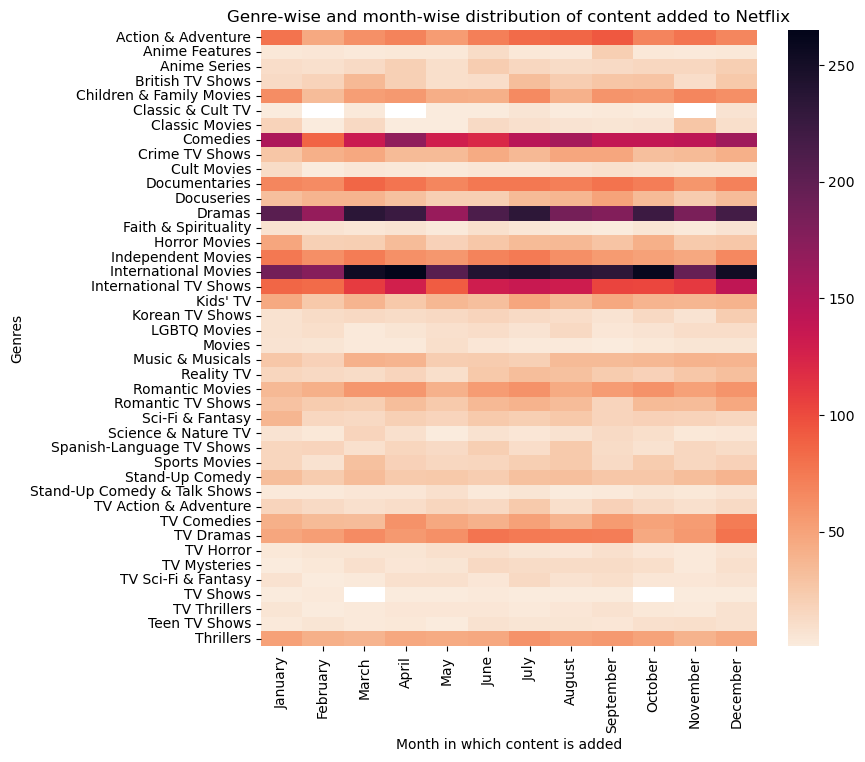

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(data=date_added_genres, cmap='rocket_r')
plt.title('Genre-wise and month-wise distribution of content added to Netflix')
plt.xlabel('Month in which content is added')
plt.ylabel('Genres')
plt.show()

**Insights**:

Based on this heatmap, Netflix seems to be consistent in producing almost same number of content in each month. Dramas, Comedies, International Movies and TV Shows seem to have an all-time high demand.

## 3.5 Exploration of delay in content addition to Netflix after its release

In [43]:
date_added_release_year = df[['show_id','type','release_year','date_added']].drop_duplicates().reset_index(drop=True)
date_added_release_year['year_added'] = date_added_release_year['date_added'].dt.year
date_added_release_year.drop('date_added',axis=1,inplace=True)
date_added_release_year

,show_id,type,release_year,year_added
0,s1,Movie,2020,2021
1,s2,TV Show,2021,2021
2,s3,TV Show,2021,2021
3,s4,TV Show,2021,2021
4,s5,TV Show,2021,2021
...,...,...,...,...
8802,s8803,Movie,2007,2019
8803,s8804,TV Show,2018,2019
8804,s8805,Movie,2009,2019
8805,s8806,Movie,2006,2020


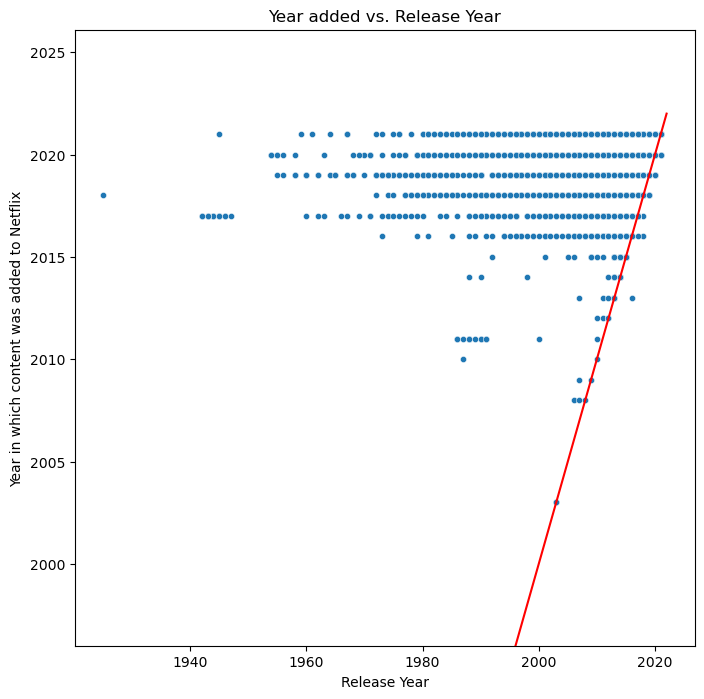

In [46]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=date_added_release_year, 
                x='release_year',
                y='year_added',
                s=20)
plt.plot([1940,2022],[1940,2022], color='r')
plt.ylim(bottom=1996)
plt.title('Year added vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Year in which content was added to Netflix')
plt.show()

**Insights**:

Over the red line, the release year is the same as year in which content was added to Netflix. But most of the content on Netflix has been added post 2015, irrespective of the release year, even though Netflix was founded in 1997. Netflix seems to be delaying the addition of content to its platform.

# Business Recommendations

1. As there is much lesser proportion of TV Shows globally, Netflix should invest in hiring good writers to create high-quality TV Shows which can drive binge-watching and thus, user retention.
2. A focus on tailoring durations of movies according to genre is recommended. Users seem to prefer short and light movies in the comedy genre, whereas dramas and action films need longer durations to keep the viewer hitched to the story. Studying user completion data can also help to adjust durations of future movies.
3. Netflix should keep producing one-season TV Shows, with a focus on robust, binge-worthy stories. Another ways to have multi-season TV Shows are Anthologies or Mini-Series. Shows such as Black Mirror or Modern Love, are produced such that each episode is a standalone short-film, so the users can randomly watch any episode at any time. 
4. Netflix is currently mostly producing content suitable for Mature Audiences, or content which requires parental guidance. Instead, They should focus more on producing 'General', family-friendly content, which can be consumed by a relatively much larger population.
5. Netflix should consider producing regional content, simultaneously inculcating the regional storytelling arts and culture, as is done with Japanese Anime and South Korean Dramas.
6. China, the second most populated country, has a huge potential of business. Despite that, China is not present in top 10 countries. Netflix should consider producing China-specific content and also collaborate with Chinese Government and writers to tap a new class of customers.
7. Netflix can capitalize over global holidays such as Christmas or Diwali (during October to December), by scheduling major releases.
8. Based on the decreasing duration of movies over the years, Netflix should focus on producing more short-films of 90-100 minutes durations. Here, a large focus will need to be given to an engaging and no-nonsense storyline, for a shorter-yet-stronger content.
9. A large delay in accquiring and adding a content on its platform after its release is not beneficial. This discourages users who are looking for high-demand content, and can cause user attrition to different competitor platforms. One solution to this is that Netflix can increase its investment to 'Netflix Originals', to ensure timely releases and exclusivity.